<a href="https://colab.research.google.com/github/sh-biswas/demand-forecasting_Cogs109Final/blob/master/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [3]:
data_train = 'https://raw.githubusercontent.com/sh-biswas/demand-forecasting_Cogs109Final/master/train.csv'
train = pd.read_csv(data_train)

In [4]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [41]:
data_test = 'https://raw.githubusercontent.com/sh-biswas/demand-forecasting_Cogs109Final/master/test.csv'
test = pd.read_csv(data_test)
test.drop('id', inplace=True, axis=1)
test.head(50)

,date,store,item
0,2018-01-01,1,1
1,2018-01-02,1,1
2,2018-01-03,1,1
3,2018-01-04,1,1
4,2018-01-05,1,1
5,2018-01-06,1,1
6,2018-01-07,1,1
7,2018-01-08,1,1
8,2018-01-09,1,1
9,2018-01-10,1,1


Check if there are any null values

In [6]:
train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [7]:
test.isnull().sum()

date     0
store    0
item     0
dtype: int64

There are no null values in both our test and train datasets.

How many different stores are there in the train dataset?

In [8]:
stores = train.store.unique().sum()
print(stores)

55


How many different items in the train dataset?

In [38]:
items = train.item.unique()
print(items)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


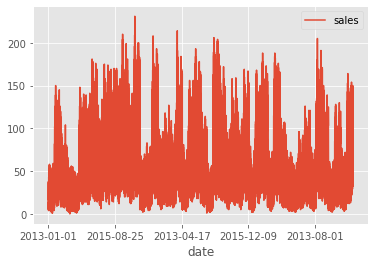

In [ ]:
train.plot('date', 'sales')

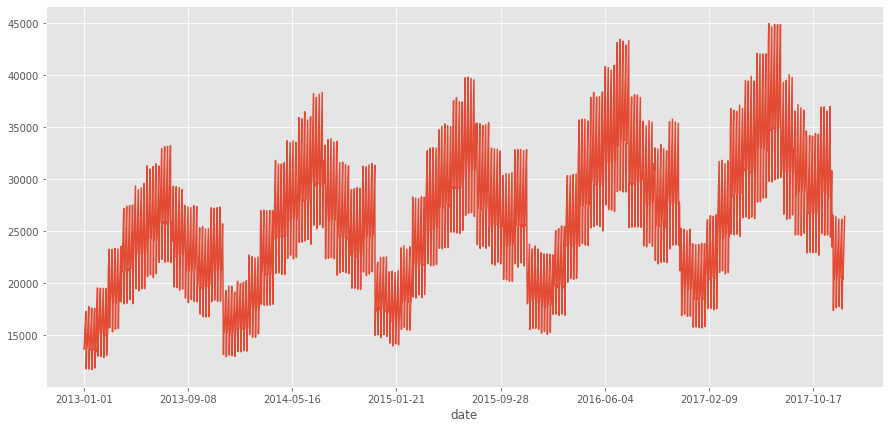

In [35]:
fig, ax = plt.subplots(figsize=(15,7))
train.groupby(['date']).sum()['sales'].plot(ax=ax)

In [33]:
np.argmax(train.groupby(['item']).sum()['sales'])

14

In [36]:
len(train.groupby(['item']).sum()['sales'])

50

In [ ]:
train.head(50)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


Model each item individually for all the stores -> supplier knows how many of each item to distribute over the time span of the test data(supplier perspective)